# Assignment 4 - PCA

Q1: Load the load_digit dataset from sklearn.datasets.

This dataset is made up of 1797 8x8 images. Each image is of a hand-written digit. Therefore, each training example has 64 features (8X8) pixel values. Hence, the size of dataset is 1797X64.

Implement feature selection technique using Principal Component Analysis (PCA) using step-by-step approach.

In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()['data']
digits_target=load_digits()['target']

1)STANDARDIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(digits)
X_std.shape

(1797, 64)

2) COVARIANCE MATRIX COMPUTATION

In [ ]:
import numpy as np
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
mean_vect=np.mean(X_std,axis=0)
cov_matt=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print(cov_mat)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00055679  0.55692803 ... -0.02988686  0.02656195
  -0.04391324]
 [ 0.          0.55692803  1.00055679 ... -0.04120565  0.07263924
   0.08256908]
 ...
 [ 0.         -0.02988686 -0.04120565 ...  1.00055679  0.64868875
   0.26213704]
 [ 0.          0.02656195  0.07263924 ...  0.64868875  1.00055679
   0.62077355]
 [ 0.         -0.04391324  0.08256908 ...  0.26213704  0.62077355
   1.00055679]]


3) COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS

[7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.29406627 0.05037444 0.27692285 0.06328961 0.258273
 0.24783029 0.2423566  0.07635394 0.08246812 0.09018543 0.09840876
 0.10250434 0.11188655 0.11932898 0.12426371 0.13321081 0.14311427
 0.217582   0.15818474 0.16875236 0.20799593 0.17612894 0.2000909
 0.18983516 0.         0.         0.        ]
[[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.18223392 -0.04702701  0.02358821 ...  0.          0.
   0.        ]
 [ 0.285868   -0.0595648  -0.05679875 ...  0.          0.
   0.        ]
 ...
 [ 0.103198    0.24261778 -0.02227952 ...  0.          0.
   0.

<Figure size 864x864 with 0 Axes>

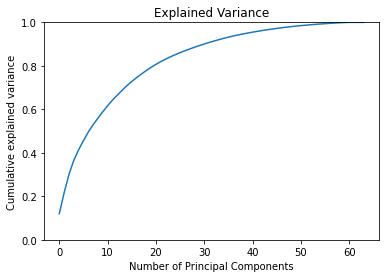

[(0, 0.12033916097734906), (1, 0.2159497050083281), (2, 0.30039385393457346), (3, 0.36537793300981514), (4, 0.4139794817694792), (5, 0.4561206804621987), (6, 0.49554150849787254), (7, 0.5294353177442558), (8, 0.559417527860508), (9, 0.5887375533730302), (10, 0.6165556080085336), (11, 0.6423261589343537), (12, 0.6650791920919963), (13, 0.6873509894871398), (14, 0.7090032838056322), (15, 0.7281449498700535), (16, 0.7459004207217355), (17, 0.7622811134645797), (18, 0.7782457151532031), (19, 0.7931376270240813), (20, 0.8066173226822607), (21, 0.8193366363846083), (22, 0.8309950098905278), (23, 0.841571475875891), (24, 0.8513246353478721), (25, 0.8607702252451921), (26, 0.8694003635148994), (27, 0.8777667920515845), (28, 0.8857437245356969), (29, 0.8932084382449575), (30, 0.9004642597586603), (31, 0.9073833722134721), (32, 0.9139224575691982), (33, 0.920330383307658), (34, 0.9262442244248815), (35, 0.9319558484771168), (36, 0.9371922165112831), (37, 0.9420102923757345), (38, 0.9465474849743

In [ ]:
import matplotlib.pyplot as plt
cov_mat=np.cov(X_std.T)
eig_vals,eig_vecs=np.linalg.eig(cov_mat)
cov_matt=np.cov(X_std.T)
lam_sum = sum(eig_vals)
explained_variance = [(lam_k/lam_sum) for lam_k in sorted(eig_vals, reverse=True)]
eig_vals,eig_vecs=np.linalg.eig(cov_mat)
print(eig_vals)
print(eig_vecs)
fig = plt.figure(figsize=(12,12))
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.plot(np.cumsum(explained_variance))
ax1.set_ylim([0,1.0])
ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Cumulative explained variance')
ax1.set_title('Explained Variance')
plt.show()
print([(j, np.cumsum(explained_variance)[j]) for j in range(len(explained_variance[:64]))])

4) FEATURE VECTOR

In [ ]:
feature_vec=[]
eigenvals_sorted=sorted(eig_vals,reverse=True)[:30]
for val in eigenvals_sorted:
  index=(np.where(eig_vals==val))[0][0]
  feature_vec.append(eig_vecs[:,index])
feature_vec=np.array(feature_vec)
feature_vec.shape

(30, 64)

5) Recast the data along the principal components axes

In [ ]:
import pandas as pd
final=np.dot(X_std,np.transpose(feature_vec))
projected=pd.DataFrame(final)
projected

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-1.914214,0.954502,-3.946035,-2.028723,-0.267173,0.530327,1.415321,-1.496062,-0.124914,-0.822246,-0.499693,0.789466,0.228125,-0.195142,-0.837040,-0.104341,0.185323,0.090057,0.412754,0.430517,0.450994,-0.558703,0.508826,-0.758896,0.464500,-0.732176,-0.327318,0.157022,-0.404918,-0.324594
1,-0.588980,-0.924636,3.924755,1.779850,-0.993430,-0.675652,-1.878565,-0.556336,-1.079877,0.087451,-0.505000,-0.641593,-0.048361,-0.392054,0.744412,0.214072,-0.101727,0.422000,0.553085,-0.069676,0.909818,0.242434,-0.478472,0.491158,-0.790504,-0.067788,1.525555,-0.742482,0.855856,-0.277084
2,-1.302039,0.317189,3.023333,2.043376,-2.081155,0.935121,1.296200,-1.156160,-0.785606,-1.099206,2.196453,2.310276,-0.566874,-0.995772,1.170505,-0.399017,-0.240298,0.465223,-1.065556,-1.133454,-0.525917,-0.069262,-1.276142,-0.389437,0.407580,0.121614,-0.373418,0.205099,0.362138,1.181186
3,3.020770,0.868772,-0.801744,2.187039,-0.556813,0.727124,-0.959766,1.382638,-0.259075,0.744555,-1.065129,-0.491755,-0.166579,1.008790,0.141893,1.000781,-0.950687,0.400034,1.490825,0.308128,0.560421,0.167976,0.573332,-0.532997,0.084318,0.466793,-0.154232,-0.403244,-0.291934,-1.244539
4,-4.528949,1.093480,0.973121,1.419510,-1.715106,1.431592,-1.073649,0.968240,1.660216,1.174593,-1.017440,1.365994,-0.343716,-0.113469,-0.732635,-0.210692,-0.094411,0.552371,1.613976,1.086368,0.495644,0.185698,0.960864,-0.184642,-0.563999,2.142481,-0.064456,0.746668,-1.076306,0.297665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-0.104331,-0.255024,-3.765861,1.947006,-0.190094,-0.555760,-0.531222,-0.476475,-1.152430,-0.473054,-0.635879,-0.803622,1.205195,-0.700724,-0.187246,-0.161669,0.504438,-0.357642,-0.956725,0.816109,0.030250,0.783514,-0.676671,-0.042743,0.359572,0.066849,-0.203868,0.058615,-0.979933,-0.122796
1793,-2.423234,1.429611,-3.045245,-2.632089,-0.822902,0.004061,1.106872,-2.330903,-0.569455,-1.654173,-0.460155,0.530551,0.858305,0.885069,0.702222,-1.098425,0.301699,0.311522,-0.307535,0.110083,-0.957759,0.041950,0.379564,0.082078,-0.213136,0.864603,-0.272784,-0.567033,0.769823,-0.008326
1794,-1.022596,0.147911,2.469974,0.620307,-0.972043,-0.007377,-0.381115,-0.529064,-2.054709,-2.036838,-0.679554,-0.396803,-0.409313,0.257614,-0.334953,-1.162071,1.124031,-0.669245,-1.612100,0.182303,0.166667,0.237439,0.041549,0.235181,0.261485,1.340361,0.054225,-0.352066,-0.521824,-0.271170
1795,-1.076055,0.380906,-2.455487,1.312013,0.253533,-0.638322,-1.034470,-0.763325,-1.077474,-0.334527,-0.980131,-0.606451,0.169573,-0.759176,-0.014572,-0.158465,1.686638,-0.811822,-1.769181,0.774718,-0.135668,0.433929,1.111662,0.312411,0.940159,-1.152000,0.662983,0.979041,-0.293561,-0.711736


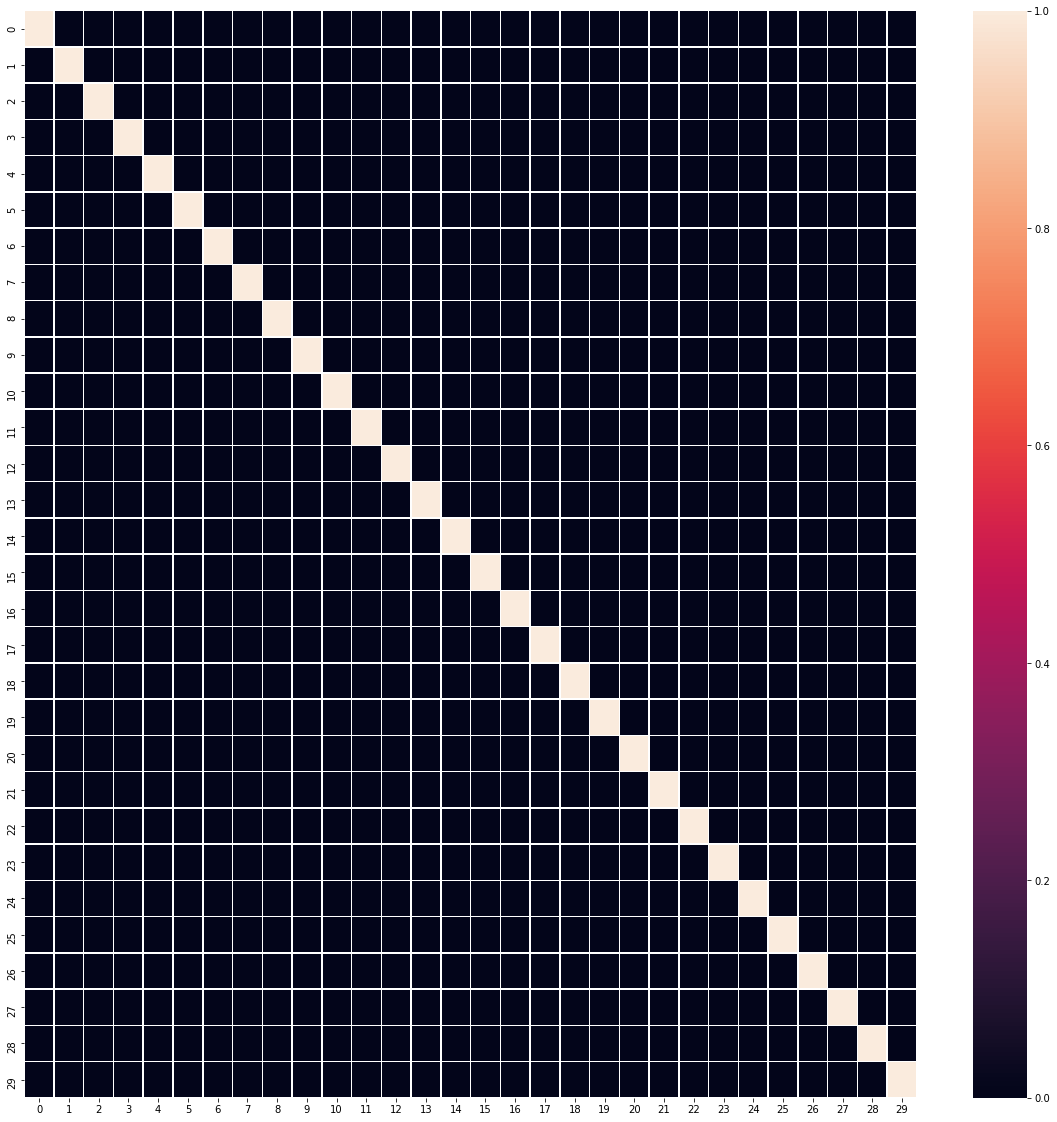

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(projected.corr(),linewidths=.5)
plt.show()